## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Read dataset

In [2]:
# Caminho do banco de dados
datapath = '../../dataset/ml-100k.csv'

In [3]:
# Leitura dos dados
data = pd.read_csv(datapath, delim_whitespace=True, header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,...,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,1.858961,0.445387,0.289502,0.786850,0.301166,0.098621,1.579003,0.927890,1.235419,0.361612,...,0.003181,0.004242,0.003181,0.002121,0.003181,0.001060,0.003181,0.002121,0.003181,0.003181
std,2.042084,1.166107,0.966513,1.543481,0.992792,0.623179,1.977008,1.755518,1.906447,1.162804,...,0.097693,0.130258,0.097693,0.065129,0.097693,0.032564,0.097693,0.065129,0.097693,0.097693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,2.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000


In [6]:
# Substituio os zeros (avalizações não feitas) por NaN
data.replace(0, np.nan, inplace=True)

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
count,452.000000,131.000000,90.000000,209.000000,86.000000,26.000000,392.000000,219.000000,299.000000,89.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.878319,3.206107,3.033333,3.550239,3.302326,3.576923,3.798469,3.995434,3.896321,3.831461,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
std,0.927897,0.966497,1.212760,0.965069,0.946446,1.301478,0.982037,1.002281,1.042368,1.013948,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
25%,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
50%,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.0,4.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0


#### 1. Média, desvio padrão e variância das avaliações

* Média

In [8]:
# Função que mostra a media das avaliações por filme 'n'
def media_avaliacao(n):
    ma=round(np.mean(data.loc[:,n:n]),2).item()
    return ma

In [9]:
media_avaliacao(0)

3.88

* Desvio padrão

In [10]:
# Função que mostra o desvio padrão das avaliações por filme 'n'
def desv_pad_avaliacao(n):
    dpa=round(np.std(data.loc[:,n:n]),2).item()
    return dpa

In [11]:
desv_pad_avaliacao(0)

0.93

* Variância

In [12]:
# Função que mostra a variância das avaliações por filme 'n'
def var_avaliacao(n):
    va=round(np.var(data.loc[:,n:n]),2).item()
    return va

In [13]:
var_avaliacao(0)

0.86

#### 2. Média, desvio padrão e variância dos usuários

* Média

In [14]:
# Função que mostra a media das avaliações por usuário 'n'
media_usuario = []
for n in range(len(data.index)):
    media_usuario.append(np.mean(data.loc[n:n,:], axis=1).item())

In [15]:
media_usuario[0]

3.610294117647059

In [16]:
# Adiciona a coluna 'Média' ao data frame
data['Média'] = media_usuario

In [17]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,Média
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286


* Desvio padrão

In [18]:
# Função que mostra o desvio padrão das avaliações por usuário 'n'
desvio_padrao_usuario = []
for n in range(len(data.index)):
    desvio_padrao_usuario.append(np.std(data.loc[n:n,:], axis=1).item())

In [19]:
desvio_padrao_usuario[0]

1.2589477210595874

In [20]:
# Adiciona o 'Desvio padrão' ao data frame
data['Desvio padrão'] = desvio_padrao_usuario

In [21]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1674,1675,1676,1677,1678,1679,1680,1681,Média,Desvio padrão
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197


* Variância

In [22]:
# Função que mostra a variância das avaliações por usuário 'n'
var_usuario = []
for n in range(len(data.index)):
    var_usuario.append(np.var(data.loc[n:n,:], axis=1).item())

In [23]:
var_usuario[0]

1.5992694457522074

In [24]:
# Adiciona a 'Variância' ao data frame
data['Variância'] = var_usuario

In [25]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1675,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948,1.599269
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983,1.123866
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656,1.451293
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394,1.184777
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197,1.839146


#### 3. Indivíduos com avalições uniformes

Isso significa menor variânica

In [26]:
# Função que mostra os top n indivíduos com menor variânica nas avaliações
def avaliacoes_uniformes(n):
    au=data.sort_values('Variância').loc[:,'Variância'].head(n)
    return(au)

In [27]:
avaliacoes_uniformes(5)

551    0.368217
9      0.404494
274    0.412645
59     0.449269
500    0.467368
Name: Variância, dtype: float64

#### 4. Indivíduos com avaliações divergentes

Isso significa maior variância

In [28]:
# Função que mostra os top n indivíduos com maior variânica nas avaliações
def avaliacoes_divergentes(n):
    ad=data.sort_values('Variância', ascending=False).loc[:,'Variância'].head(n)
    return(ad)

In [29]:
avaliacoes_divergentes(10)

608    2.771939
761    2.562267
530    2.560964
37     2.528161
173    2.464243
67     2.418755
218    2.411151
178    2.410990
198    2.330240
126    2.299802
Name: Variância, dtype: float64

#### 5. Indivíduos com avaliações fora do padrão (**outliers**)

z-score

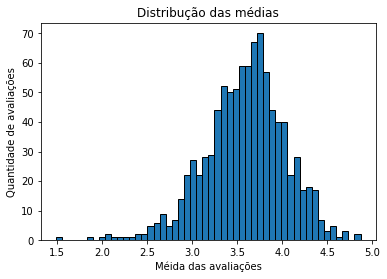

In [54]:
# Dados para o eixo 'y'
y = data['Média']

# Histograma do Matplotlib
plot = plt.hist(y, edgecolor='black', bins=50)

# Nomes dos eixos
plt.title('Distribução das médias')
plt.xlabel('Méida das avaliações')
plt.ylabel('Quantidade de avaliações')

# Plot
plt.show(plot)

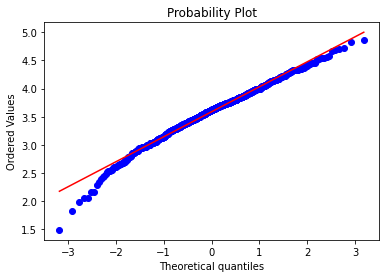

In [56]:
# Plot de distribuição normal
stats.probplot(y, dist='norm', plot=plt)
plt.show()

In [65]:
np.std(data['Média'], ddof = 3)

0.44570689613815023

In [78]:
x = data['Média']
x_mean = data['Média'].mean()
x_sd = np.std(data['Média'], ddof = 1)

z_score = (x - x_mean)/x_sd

zs_data = pd.DataFrame({'Médias':x, 'Z-score':z_score})
zs_data

,Médias,Z-score
0,3.610294,0.049644
1,3.709677,0.272860
2,2.796296,-1.778606
3,4.333333,1.673599
4,2.874286,-1.603440
...,...,...
938,4.265306,1.520809
939,3.457944,-0.292537
940,4.045455,1.027019
941,4.265823,1.521969


In [84]:
data['Z-score'] = z_score
data

,0,1,2,3,4,5,6,7,8,9,...,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância,Z-score
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.610294,1.258948,1.599269,0.049644
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.709677,1.013983,1.123866,0.272860
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.796296,1.196656,1.451293,-1.778606
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.333333,0.879394,1.184777,1.673599
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.874286,1.355197,1.839146,-1.603440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265306,0.954474,1.103876,1.520809
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.457944,1.002593,1.050772,-0.292537
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.045455,0.858577,1.111982,1.027019
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.265823,0.753473,0.711136,1.521969


In [81]:
zs_data['Z-score'].max()

2.8779822815195466

Considerando **outliers** indivíduos com Z-Score > 3, não temos tais indivíduos no lado direito do conjunto de dados.

In [82]:
zs_data['Z-score'].min()

-4.70817471504001

In [86]:
data.loc[data['Z-score'] < -3]

,0,1,2,3,4,5,6,7,8,9,...,1676,1677,1678,1679,1680,1681,Média,Desvio padrão,Variância,Z-score
180,3.0,NaN,2.0,NaN,NaN,1.0,4.0,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.491954,0.844195,0.711992,-4.708175
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.171875,1.441737,2.055067,-3.181064
404,NaN,1.0,NaN,4.0,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.834464,1.343359,1.802497,-3.938893
444,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.985185,1.091310,1.188055,-3.600371
684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.050000,0.722100,0.574235,-3.454796
723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.164706,1.301583,1.683110,-3.197166
773,NaN,1.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.058036,1.135773,1.288019,-3.436748


#### 6. Distância

Similaridade de Cosseno

Similaridade de Pearson